In [1]:
names=["back0","biceps0","triceps0","chest0","back1","biceps1","triceps1","chest1"]
classes=[0,1,2,3,0,1,2,3]

name_classes=["back","biceps","triceps","chest"]

incT=50
incT2=incT*5

winIndSize=list(range(-39,1,1))

print(winIndSize, "#", len(winIndSize))


focusIndexIn=0


[-39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0] # 40


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean



X=[]
Y=[]
Z=[]
L=[]
TT=[]
C=[]




incT0=0
N=0
for iname,name in enumerate(names):
    
    if(classes[iname]!=focusIndexIn):
        continue
    
    series=read_csv(name+".tsv", sep="\t",parse_dates=False)
    Ylabel=read_csv(name+"F.L.tsv", sep="\t",parse_dates=False)

    print(series.values)
            
    TY=np.array(Ylabel["timestamp"])
    LY=np.array(Ylabel["label"])

    print("TL0:",TY)
    print("LY0:",LY)


    lastT=-1
    for i in range(0,len(TY)):
        if(LY[i]==0 or LY[i]==-1):
            TY[i]=TY[i]+lastT
            lastT=TY[i]
        if(LY[i]==1):
            lastT=TY[i]
        if(LY[i]==-1):
            lastT=-1

    print("TL:",TY)
    print("LY:",LY)

    T=np.array(series["timestamp"])

    t0=T[0]
    tY0=TY[0]
    tN=T[-1]
    print(t0,tN)

    tY0=int(tY0/incT)*incT
    t0=int(t0/incT)*incT
    tN=int(tN/incT)*incT

    print("TIMES:",t0,tN, (int)(tN-t0)/1000)


    v0=0
    sesion=False
    for ti in range(t0,tN,incT2):
        print("ti:",ti, ti-t0)

        i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
        print("i2:",i[0], "LY:",LY[i[0]])

        if(len(i[0])>0):
            l=LY[i[0][0]]
            if(l==1):
                v0=0
                sesion=True
            if(l==-1):
                v0=0
                sesion=False    
            if(l==0):
                v0=0


        if(sesion):
            v0=v0+0.1
            print("v0:",v0)
            L.append(v0)
        else:
            L.append(-1)


        i=np.where( (T>=ti) & (T<=ti+incT))
        print(i)
        print(series.values[i])

        x0=mean(series.values[i][:,0])
        y0=mean(series.values[i][:,1])
        z0=mean(series.values[i][:,2])
        
        print("x0",x0,"y0",y0,"z0",z0)
        #print("X",X,"Y",Y,"Z",Z)

        if(sesion):
            X.append(x0)
            Z.append(z0)
            Y.append(y0)         
        else:
            X.append(x0)
            Z.append(z0)     
            Y.append(y0)         
        #print(x0,y0,z0)    



        TT.append(ti-t0+incT0)
        C.append(classes[iname])
        N=N+1
    incT0=incT0+ti-t0

[[ 7.00000000e-01  3.90000000e+00  7.50000000e+00  1.68840200e+12]
 [ 1.20000000e+00  5.50000000e+00  7.70000000e+00  1.68840200e+12]
 [ 1.80000000e+00  5.50000000e+00  8.20000000e+00  1.68840200e+12]
 ...
 [-6.00000000e-01 -3.40000000e+00  8.70000000e+00  1.68840219e+12]
 [-7.00000000e-01 -3.10000000e+00  9.20000000e+00  1.68840219e+12]
 [-1.40000000e+00 -1.30000000e+00  1.00000000e+01  1.68840219e+12]]
TL0: [ 29500   2500   2500   2000   2000   2500   2000   2000   2000   2500
   2500    500  67000   3000   2500   2000   2000   2500   2000   2000
   2000   2500   2000    500 107000   3000   2500   2000   2000   2500
   2000   2000   2000   2500   2000    500 151500   3000   2500   2000
   2000   2500   2000   2000   2500   2000   2000    500]
LY0: [ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]
TL: [ 29500  32000  34500  36500  38500  41000  43000  45000  47000  49500
  52000  52500  67

[[ 5.70000000e+00 -5.20000000e+00 -1.00000000e+00  1.68840213e+12]
 [ 6.50000000e+00 -5.20000000e+00 -1.50000000e+00  1.68840213e+12]
 [ 6.00000000e+00 -5.30000000e+00 -1.70000000e+00  1.68840213e+12]]
x0 6.066666666666666 y0 -5.233333333333333 z0 -1.4000000000000001
ti: 1688402129550 125500
i2: [] LY: []
v0: 0.30000000000000004
(array([6275, 6276], dtype=int64),)
[[ 6.50000000e+00 -6.80000000e+00 -2.30000000e+00  1.68840213e+12]
 [ 6.90000000e+00 -5.90000000e+00 -2.40000000e+00  1.68840213e+12]]
x0 6.7 y0 -6.35 z0 -2.3499999999999996
ti: 1688402129800 125750
i2: [] LY: []
v0: 0.4
(array([6287, 6288, 6289], dtype=int64),)
[[ 9.40000000e+00 -6.20000000e+00 -3.00000000e-01  1.68840213e+12]
 [ 9.40000000e+00 -5.50000000e+00 -1.20000000e+00  1.68840213e+12]
 [ 9.50000000e+00 -3.90000000e+00 -1.90000000e+00  1.68840213e+12]]
x0 9.433333333333334 y0 -5.2 z0 -1.1333333333333333
ti: 1688402130050 126000
i2: [] LY: []
v0: 0.5
(array([6300, 6301], dtype=int64),)
[[ 1.22000000e+01 -3.20000000e+00

x0 10.299999999999999 y0 -7.266666666666667 z0 -2.866666666666667
ti: 1688679830500 51000
i2: [] LY: []
v0: 0.2
(array([2549, 2550], dtype=int64),)
[[ 1.19000000e+01 -8.10000000e+00 -4.20000000e+00  1.68867983e+12]
 [ 1.16000000e+01 -7.60000000e+00 -5.00000000e+00  1.68867983e+12]]
x0 11.75 y0 -7.85 z0 -4.6
ti: 1688679830750 51250
i2: [] LY: []
v0: 0.30000000000000004
(array([2561, 2562, 2563], dtype=int64),)
[[ 4.70000000e+00 -8.40000000e+00 -5.10000000e+00  1.68867983e+12]
 [ 4.10000000e+00 -8.50000000e+00 -5.30000000e+00  1.68867983e+12]
 [ 3.90000000e+00 -8.50000000e+00 -4.90000000e+00  1.68867983e+12]]
x0 4.233333333333333 y0 -8.466666666666667 z0 -5.1
ti: 1688679831000 51500
i2: [] LY: []
v0: 0.4
(array([2574, 2575], dtype=int64),)
[[-1.00000000e-01 -3.20000000e+00 -1.20000000e+00  1.68867983e+12]
 [ 4.00000000e-01 -4.20000000e+00 -1.30000000e+00  1.68867983e+12]]
x0 0.15000000000000002 y0 -3.7 z0 -1.25
ti: 1688679831250 51750
i2: [] LY: []
v0: 0.5
(array([2586, 2587, 2588], dtyp

x0 12.733333333333334 y0 0.8333333333333334 z0 2.8000000000000003
ti: 1688679932500 153000
i2: [] LY: []
(array([7649, 7650], dtype=int64),)
[[ 7.80000000e+00 -4.30000000e+00  1.30000000e+00  1.68867993e+12]
 [ 8.10000000e+00 -3.20000000e+00  8.00000000e-01  1.68867993e+12]]
x0 7.949999999999999 y0 -3.75 z0 1.05
ti: 1688679932750 153250
i2: [] LY: []
(array([7661, 7662, 7663], dtype=int64),)
[[ 1.00000000e+01 -5.70000000e+00 -3.00000000e-01  1.68867993e+12]
 [ 1.09000000e+01 -4.00000000e+00  3.00000000e-01  1.68867993e+12]
 [ 1.23000000e+01 -1.90000000e+00  8.00000000e-01  1.68867993e+12]]
x0 11.066666666666668 y0 -3.8666666666666667 z0 0.26666666666666666
ti: 1688679933000 153500
i2: [] LY: []
(array([7674, 7675], dtype=int64),)
[[ 1.10000000e+01 -2.20000000e+00  1.30000000e+00  1.68867993e+12]
 [ 1.07000000e+01 -3.60000000e+00  5.00000000e-01  1.68867993e+12]]
x0 10.85 y0 -2.9000000000000004 z0 0.9
ti: 1688679933250 153750
i2: [] LY: []
(array([7686, 7687, 7688], dtype=int64),)
[[ 7.

x0 8.0 y0 -5.7 z0 -1.7666666666666666
ti: 1688680041500 262000
i2: [] LY: []
(array([13099, 13100], dtype=int64),)
[[ 8.50000000e+00 -4.70000000e+00 -8.00000000e-01  1.68868004e+12]
 [ 8.80000000e+00 -4.50000000e+00 -1.10000000e+00  1.68868004e+12]]
x0 8.65 y0 -4.6 z0 -0.9500000000000001
ti: 1688680041750 262250
i2: [] LY: []
(array([13111, 13112, 13113], dtype=int64),)
[[ 9.00000000e+00 -4.80000000e+00 -1.10000000e+00  1.68868004e+12]
 [ 9.00000000e+00 -4.90000000e+00 -1.00000000e+00  1.68868004e+12]
 [ 8.80000000e+00 -4.90000000e+00 -1.10000000e+00  1.68868004e+12]]
x0 8.933333333333334 y0 -4.866666666666666 z0 -1.0666666666666667
ti: 1688680042000 262500
i2: [] LY: []
(array([13124, 13125], dtype=int64),)
[[ 8.90000000e+00 -5.70000000e+00 -9.00000000e-01  1.68868004e+12]
 [ 9.00000000e+00 -5.40000000e+00 -9.00000000e-01  1.68868004e+12]]
x0 8.95 y0 -5.550000000000001 z0 -0.9
ti: 1688680042250 262750
i2: [] LY: []
(array([13136, 13137, 13138], dtype=int64),)
[[ 7.50000000e+00 -4.3000

[[ 1.08000000e+01 -9.80000000e+00 -2.10000000e+00  1.68868014e+12]
 [ 1.18000000e+01 -7.80000000e+00 -8.00000000e-01  1.68868014e+12]
 [ 1.31000000e+01 -4.10000000e+00 -3.00000000e-01  1.68868014e+12]]
x0 11.9 y0 -7.233333333333334 z0 -1.0666666666666667
ti: 1688680144000 364500
i2: [] LY: []
(array([18224, 18225], dtype=int64),)
[[1.49000000e+01 2.10000000e+00 3.80000000e+00 1.68868014e+12]
 [1.35000000e+01 9.00000000e-01 3.90000000e+00 1.68868014e+12]]
x0 14.2 y0 1.5 z0 3.8499999999999996
ti: 1688680144250 364750
i2: [] LY: []
(array([18236, 18237, 18238], dtype=int64),)
[[ 9.10000000e+00 -4.20000000e+00  0.00000000e+00  1.68868014e+12]
 [ 9.10000000e+00 -3.60000000e+00 -3.00000000e-01  1.68868014e+12]
 [ 8.80000000e+00 -2.90000000e+00 -1.00000000e-01  1.68868014e+12]]
x0 9.0 y0 -3.566666666666667 z0 -0.13333333333333333
ti: 1688680144500 365000
i2: [] LY: []
(array([18249, 18250], dtype=int64),)
[[ 6.50000000e+00 -6.60000000e+00 -1.00000000e-01  1.68868014e+12]
 [ 7.60000000e+00 -7.

In [3]:
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)
C=np.array(C)


In [4]:
X[np.argwhere(np.isnan(X))]=0
Y[np.argwhere(np.isnan(Y))]=0
Z[np.argwhere(np.isnan(Z))]=0

In [5]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
Y = (Y-np.min(Y))/(np.max(Y)-np.min(Y))
Z = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
    




In [6]:
import matplotlib.pyplot as plt


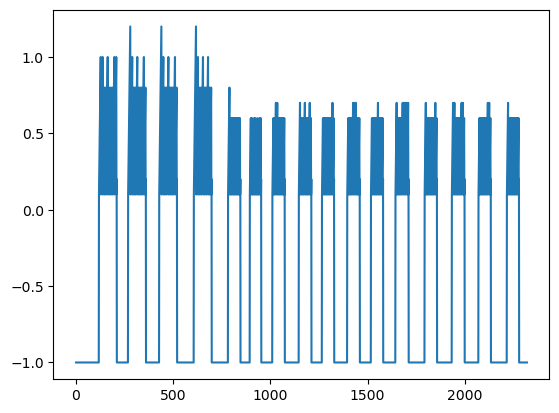

In [7]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

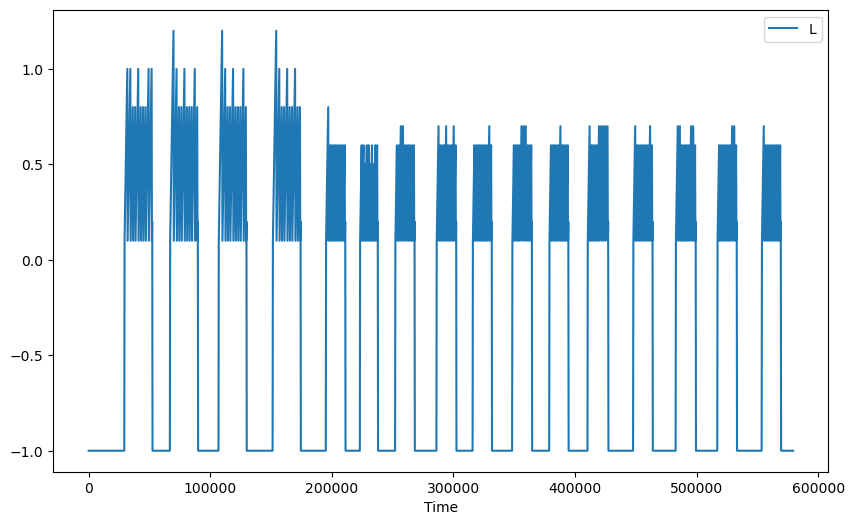

In [8]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['L']=L


df.plot(x="Time", legend=True, figsize=(10,6))


<AxesSubplot:xlabel='Time'>

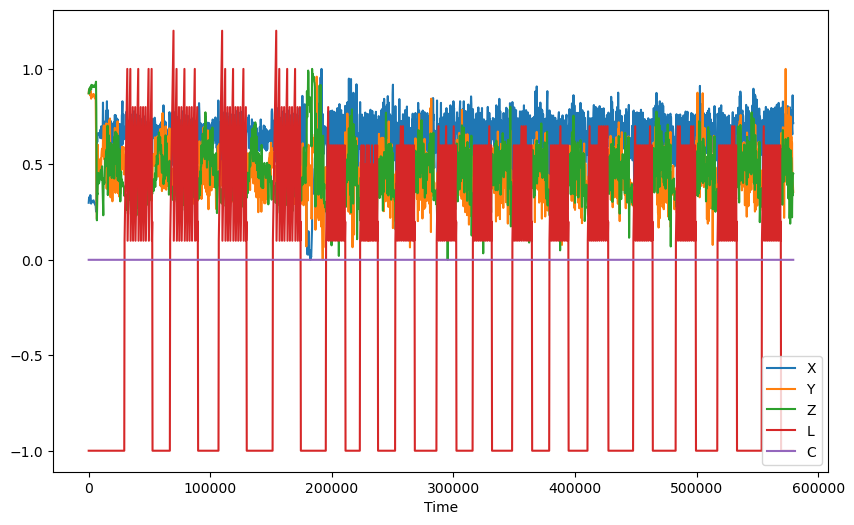

In [9]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['L']=L
df['C']=C

df.plot(x="Time", legend=True, figsize=(10,6))

In [10]:
XYZ=[]
Yreg=[]
for i in range(0,N):
    if(L[i]<0):
        continue
    print("i:",i)
    x1=[]
    y1=[]
    z1=[]
    for it in winIndSize:
        x1.append(X[i+it])
        y1.append(Y[i+it])
        z1.append(Z[i+it])
    xi=[]
    print("x1",x1)
    xi.append(x1)
    xi.append(y1)
    xi.append(z1)
    XYZ.append(np.transpose(xi))
    Yreg.append(L[i])
XYZ=np.array(XYZ)
Yreg=np.array(Yreg)

i: 118
x1 [0.6920903954802259, 0.6673728813559322, 0.5875706214689266, 0.641949152542373, 0.7203389830508474, 0.6271186440677966, 0.6031073446327684, 0.7584745762711865, 0.6384180790960452, 0.5932203389830508, 0.7570621468926554, 0.5741525423728814, 0.5819209039548022, 0.7415254237288135, 0.6313559322033897, 0.5974576271186441, 0.7358757062146892, 0.6398305084745763, 0.5918079096045198, 0.6228813559322033, 0.6920903954802259, 0.6144067796610169, 0.5692090395480226, 0.711864406779661, 0.635593220338983, 0.6271186440677966, 0.652542372881356, 0.6483050847457626, 0.5790960451977402, 0.559322033898305, 0.7556497175141244, 0.7690677966101696, 0.8305084745762712, 0.6059322033898304, 0.6327683615819208, 0.7627118644067796, 0.6299435028248588, 0.646186440677966, 0.6624293785310734, 0.6334745762711865]
i: 119
x1 [0.6673728813559322, 0.5875706214689266, 0.641949152542373, 0.7203389830508474, 0.6271186440677966, 0.6031073446327684, 0.7584745762711865, 0.6384180790960452, 0.5932203389830508, 0.757

In [11]:
print(XYZ.shape)
print(Yreg.shape)   

(1136, 40, 3)
(1136,)


In [12]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
    
from sklearn.model_selection import KFold


#Dividimos los datos en K fold para cross validation
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(XYZ)

f = open("prediction_xyz_w.tsv", "w") 
f.write("")
f.close()

Y_pred=[]
Y_real=[]
I_index=[]

for train_index, test_index in kf.split(XYZ):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    XYZ_train, XYZ_test = XYZ[train_index], XYZ[test_index]
    Yreg_train, Yreg_test = Yreg[train_index], Yreg[test_index]

    
    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(XYZ.shape[1],XYZ.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

    model.add(Dropout(0.25))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(1,activation="sigmoid"))



    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    model.summary()

    history = model.fit(XYZ_train , Yreg_train,
                    batch_size=64,
            validation_data=(XYZ_test , Yreg_test),
            epochs=5)
    
    yhat = model.predict(XYZ_test)
    
    f = open("prediction_xyz_w.tsv", "a")
    for i in range(0,len(yhat)):
        f.write(str(test_index[i])+"\t"+str(yhat[i][0]).replace('.',',')+"\t"+str(Yreg_test[i]).replace('.',',')+"\n")
    f.close()
    
    Y_pred.append(yhat[i][0])
    Y_real.append(Yreg_test[i])
    I_index.append(test_index[i])

TRAIN: [   0    2    3 ... 1133 1134 1135] TEST: [   1    8   10   16   19   27   34   45   58   59   69  103  116  126
  135  159  162  186  189  193  205  218  223  224  225  238  242  251
  263  270  276  280  287  297  324  328  340  341  354  359  381  385
  386  393  415  416  434  442  448  453  455  465  471  472  482  490
  496  509  516  521  561  569  574  598  604  607  622  626  640  656
  659  661  667  673  679  691  700  705  729  749  752  756  780  783
  786  788  789  794  836  841  868  878  901  929  931  945  960  965
  966  969  970  994  995 1015 1042 1053 1069 1078 1079 1092 1100 1112
 1125 1126]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 16)            112       
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 32)            1568      
                     

                                                                 
 conv1d_10 (Conv1D)          (None, 35, 64)            6208      
                                                                 
 conv1d_11 (Conv1D)          (None, 33, 128)           24704     
                                                                 
 dropout_7 (Dropout)         (None, 33, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 33, 256)           394240    
                                                                 
 dropout_8 (Dropout)         (None, 33, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (

                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1740625 (6.64 MB)
Trainable params: 1740625 (6.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
16/16 [==============================] - 9s 371ms/step - loss: 0.0552 - mae: 0.1939 - val_loss: 0.0391 - val_mae: 0.1645
Epoch 2/5
16/16 [==============================] - 6s 377ms/step - loss: 0.0539 - mae: 0.1926 - val_loss: 0.0382 - val_mae: 0.1655
Epoch 3/5
16/16 [==============================] - 6s 378ms/step - loss: 0.0532 - mae: 0.1900 - val_loss: 0.0408 - val_mae: 0.1684
Epoch 4/5
16/16 [==============================] - 6s 387ms/step - loss: 0.0533 - mae: 0.1905 - val_loss: 0.0400 - val_mae: 0.1658
Epoch 5/5
4/4 [==============================] - 1s 42ms/step
TRAIN: [   0    1    2 ... 1133 1134 1135] TES

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 39, 16)            112       
                                                                 
 conv1d_29 (Conv1D)          (None, 37, 32)            1568      
                                                                 
 dropout_21 (Dropout)        (None, 37, 32)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 35, 64)            6208      
                                                                 
 conv1d_31 (Conv1D)          (None, 33, 128)           24704     
                                                                 
 dropout_22 (Dropout)        (None, 33, 128)           0         
                                                                 
 lstm_14 (LSTM)              (None, 33, 256)          

                                                                 
 lstm_19 (LSTM)              (None, 256)               525312    
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 1024)              263168    
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1740625 (6.64 MB)
Trainable params: 1740625 (6.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
16/16 [==============================] - 23s 1s/step - loss: 0.0546 - mae: 0.1927 - val_loss: 

<AxesSubplot:xlabel='I_index'>

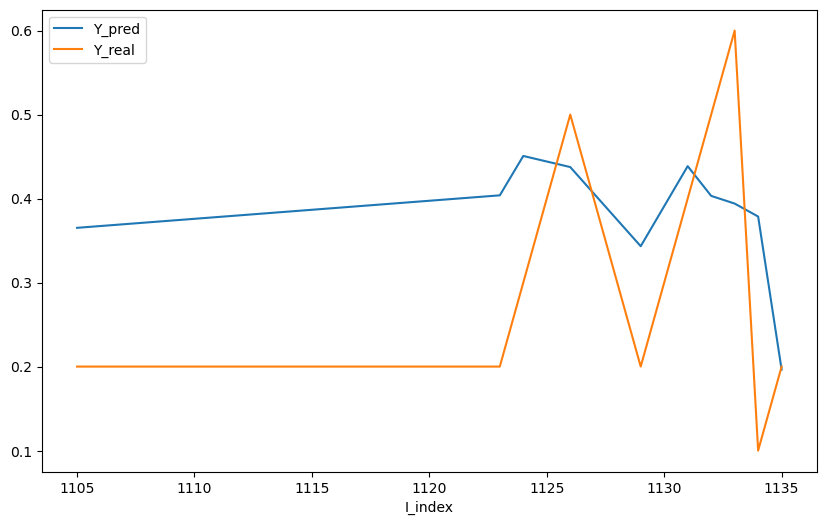

In [13]:

Y_pred=np.array(Y_pred)
Y_real=np.array(Y_real)
I_index=np.array(I_index)

sort = np.argsort(I_index)
I_index=I_index[sort]
Y_real=Y_real[sort]
Y_pred=Y_pred[sort]

df = pd.DataFrame()
df['I_index']=I_index
df['Y_pred']=Y_pred
df['Y_real']=Y_real


df.plot(x="I_index", legend=True, figsize=(10,6))